In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import spacy
import pytextrank
import re

e:\Predicting Price Moves with News Sentiment week1\Predicting-Price-Moves-with-News-Sentiment-week1\.venv\Lib\site-packages


In [3]:
df = pd.read_csv(r"E:\Predicting Price Moves with News Sentiment week1\Predicting-Price-Moves-with-News-Sentiment-week1\data\raw_analyst_ratings.csv",index_col= 0)

In [4]:
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
df.info() #check the data types of each column

<class 'pandas.core.frame.DataFrame'>
Index: 1407328 entries, 0 to 1413848
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 64.4+ MB


In [6]:
print(df.columns)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [7]:
print(df.shape) #shape of data

(1407328, 5)


In [8]:
print(df.isnull().sum()) #check null values each column

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64


In [9]:
duplicate_count = df.duplicated().sum() # duplicates row check
print(duplicate_count)

1


In [10]:
if duplicate_count > 0:   # duplicate row delete
    df.drop_duplicates(inplace=True)

In [11]:
df.shape # after cleaning check shape of the data

(1407327, 5)

In [12]:
df["headline"] = df["headline"].astype("string") #convert data type obj to string the headline column 

In [13]:
df["headline"].dtype

string[python]

In [14]:
df["date"].head(10)

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
Name: date, dtype: object

In [15]:
df["date"] = pd.to_datetime(df["date"], format= "ISO8601",utc=True) # convert the dtae column 


In [16]:
df["date"].head()

0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]

Descriptive Statistics:

Headline text length

In [17]:
headline_length = df["headline"].astype(str).str.len() #counth the headline length
print(headline_length)

0          39
1          42
2          29
3          44
4          87
           ..
1413844    38
1413845    52
1413846    56
1413847    54
1413848    81
Name: headline, Length: 1407327, dtype: int64


number of articles per publisher 

In [18]:
publisher_count = df["publisher"].value_counts()
print(publisher_count)

publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


 publication dates to see trends over time

In [19]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.day_name()
df["hour"] = df["date"].dt.hour

<Axes: xlabel='date'>

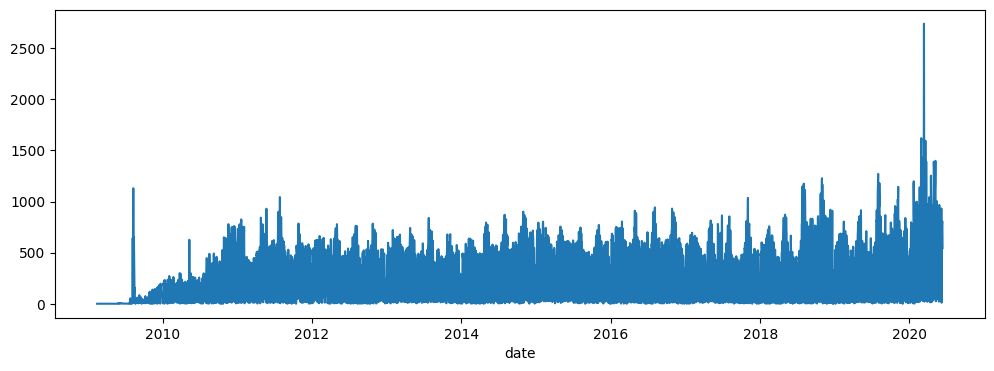

In [20]:
articles_per_day = df.groupby(df["date"].dt.date).size()
articles_per_day

articles_per_day.plot(figsize=(12,4))



<Axes: xlabel='weekday'>

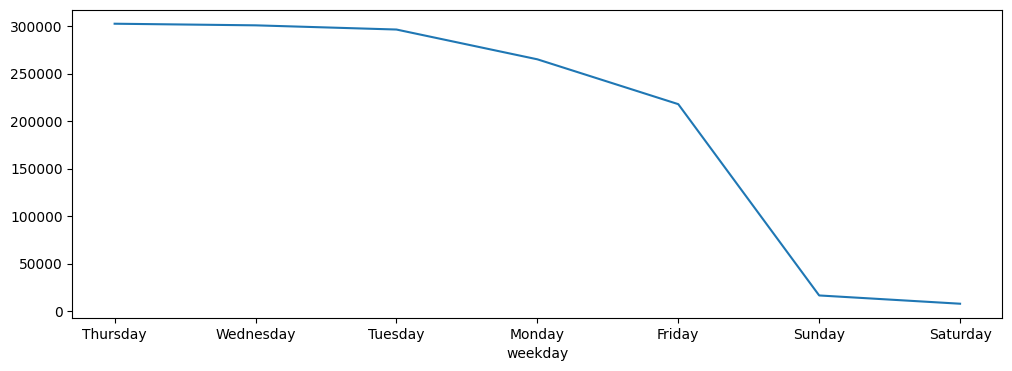

In [21]:
articles_per_weekday = df["weekday"].value_counts()
articles_per_weekday

articles_per_weekday.plot(figsize=(12,4))


C:\Users\Abas\AppData\Local\Temp\ipykernel_20872\955600039.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_per_month = df.groupby(df["date"].dt.to_period("M")).size()


<Axes: xlabel='date'>

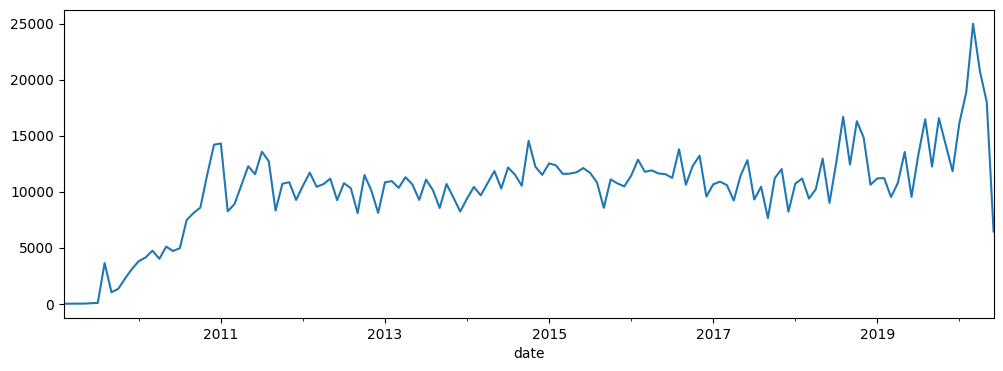

In [22]:
articles_per_month = df.groupby(df["date"].dt.to_period("M")).size()
articles_per_month.plot(figsize=(12,4))



<Axes: xlabel='year'>

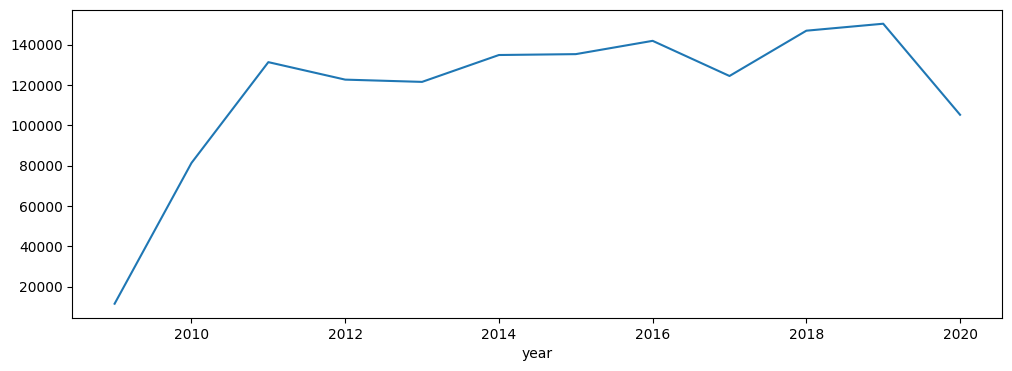

In [23]:
articles_per_year = df["year"].value_counts().sort_index()
articles_per_year.plot(figsize=(12,4))


<Axes: xlabel='hour'>

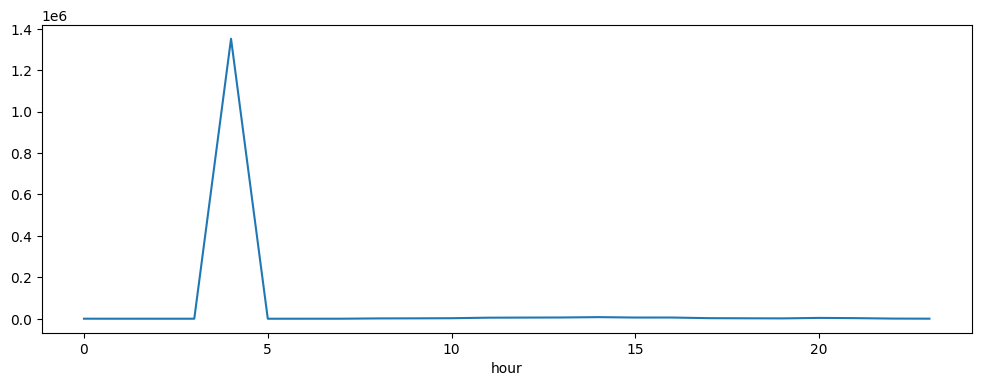

In [24]:
articles_per_hour = df["hour"].value_counts().sort_index()
articles_per_hour.plot(figsize=(12,4))



In [25]:
articles_per_hour = df["hour"].value_counts().sort_index()
articles_per_hour

hour
0         131
1          82
2          48
3          27
4     1351407
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
Name: count, dtype: int64

Text Analysis(Topic Modeling)

In [26]:
df = pd.DataFrame(df["headline"])

In [80]:
df

,headline
0,Stocks That Hit 52-Week Highs On Friday
1,Stocks That Hit 52-Week Highs On Wednesday
2,71 Biggest Movers From Friday
3,46 Stocks Moving In Friday's Mid-Day Session
4,B of A Securities Maintains Neutral on Agilent...
...,...
1413844,Top Narrow Based Indexes For August 29
1413845,Recap: Wednesday's Top Percentage Gainers and ...
1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...
1413847,Oppenheimer Initiates China Zenix At Outperfor...


In [27]:
from nltk.corpus import stopwords
from collections import Counter

In [29]:
def clean_text(text):
    text = str(text).lower()                              # lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)           # remove punctuation
    return text

In [30]:
df['clean_headline'] = df['headline'].apply(clean_text)


In [31]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textrank")


In [ ]:
def extract_keywords(text, topn=5):
    doc = nlp(text)
    keywords = []
    for phrase in doc._.phrases[:topn]:
        if all(word not in stop_words for word in phrase.text.split()):
            keywords.append((phrase.text, phrase.rank))
    return keywords

In [ ]:
df['keywords'] = df['clean_headline'].apply(lambda x: extract_keywords(x, topn=5))

print(df[['headline', 'keywords']])



Time Series Analysis:


In [ ]:
daily_counts = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Daily Publication Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


In [ ]:
df['hour'] = df['date'].dt.hour

hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(10,4))
hourly_counts.plot(kind='bar')
plt.title("Article Publication Frequency by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.show()

Publisher Analysis:


In [ ]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))


In [ ]:
plt.figure(figsize=(10,4))
publisher_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['domain'] = df['publisher'].str.extract(r'@(.+)$')
print(df['domain'].head())


In [ ]:
domain_counts = df['domain'].value_counts()
print(domain_counts.head(10))

In [ ]:
plt.figure(figsize=(10,4))
domain_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Active Email Domains")
plt.ylabel("Number of Articles")
plt.xlabel("Domain")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()